# Project: Investigate the FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
    <li><a href="#gun_explore">Gun Data Exploration</a></li>
    <li><a href="#census_explore">Census Data Exploration</a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
    <li><a href="#rq1">RQ1: Request for handguns vs long guns has changed over time?</a></li>
    <li><a href="#rq2">RQ2: Are there differences in handgun and long gun requests per capita among States?</a></li>
    <li><a href="#rq3">RQ3: Do the different percentages across States have a correlation with demographic data such as population density, education or income?</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#notes">Notes</a></li>
</ul>

<a id='intro'></a>
## Introduction

Two datasets are taken into consideration for this project; the _FBI's National Instant Criminal Background Check System_ and the _U.S. Census Data_.

#### The the FBI's National Instant Criminal Background Check System 

This ([here](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4db8_gun-data/gun-data.xlsx&sa=D&ust=1532469042127000)) database was provided as an .xlsx file and it has been converted to .csv from Excel. Therefore the starting data is found in the file **gun_data.csv**.
It goes from Novembre 1998 to September 2017, collected monthly (data up to 2020 are available, but the census data here would not cover that period)

Rows: US States

Columns:
 - checks data columns show the different reasons a shop owner can request a check. Every time gun shops are requested a transaction, they need to fill a form ([this](https://www.fbi.gov/services/cjis/nics)). This may result in
   - a permit check or recheck (if the buyer already owns a permit)
   - or in a background check. The background check is subdivided by
     - the type of arm: handgun, long gun, other, multiple or admin
     - the purpose: new buy (not written in the column title), pre-pawn, redemption, returned/disposition, rentals, private sale, return to seller 
 - The first two columns are for the month and the State the data are about
 - Last column is the total number of transactions/checks initiated. __Not neccessarily they have been concluded__.

NB: a lot of transactions are concluded privately or illegally and therefore there is no record about.
 

#### The _U.S. Census Data 

This database ([here](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv&sa=D&ust=1532469042128000)), which was already in .csv format, had the name changed in **us_census_data.csv** to be more Python friendly.
 - This dataset contains information from the 2010 census and estimates of its changes up to 2016 ([here](https://www.census.gov/quickfacts/fact/note/US/PST120218) some explanation)
 - each column represents a US State, but the first -"Fact"- and second -"Fact note"-
 - Each rows a "Fact" (e.g.: "Population, Census, April 1, 2010", "Population, percent change - April 1, 2010 (estimates base) to July 1, 2016")

In [523]:
# import statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

<a id='gun_explore'></a>
#### Gun data exploration

In [524]:
# Load data and print out a few lines

df_gun = pd.read_csv('gun_data.csv')
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [525]:
# a little general exploration
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [526]:
# what are the States and jurisdictions taken into consideration
states = df_gun['state'].unique()
print(states)
print(len(states))

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Mariana Islands' 'Maryland' 'Massachusetts'
 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska'
 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']
55


##### General
There are 12485 entries and 27 columns.

0.0 are seen as nulls.

3 columns don't contain nulls: _month, state_ and _totals_.

The database contains information about 55 US States and other jurisdictions.

##### Data
_Month_ and _state_ are string.
All other columns, but _multiple_ and _totals_ are floats.
_Multiple_ and _totals_ are integers.

- _State_ is OK as string,
- _month_ could be transformed in datetime,
- all others could be integers.

<a id='census_explore'></a>
#### Census Data exploration

In [527]:
# import census data
df_census = pd.read_csv('us_census_data.csv')
df_census.head(2)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


In [528]:
# general info
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

##### General
There are 85 rows and 52 columns.

The first 2 columns are "Fact" and "Fact notes", therefore only the 50 US States are considered (no other jurisdictions). __This list differs from the df_gun one.__

##### Data
There are spaces in column names that can be replaced by underscores.

All cells contain strings. Excluding the first 2 columns, everything will be better as integer or float. __NB: here the instances are the columns, data differ for each row -the "fact"-, so different rows contain different kind of data (e.g. units, percentages, amounts in dollars)__ 

There are a lot of Nulls.

__Before dealing with Nulls and data types is better to select the rows we are interested in__

### Data Cleaning

#### Gun data
- Adjust datatypes

In [529]:
# change month from string to datetime (it adds the day, but it is no problem)
df_gun['month'] = pd.to_datetime(df_gun['month'])

# change other columns to int
df_gun.fillna(0, inplace=True) # replace nulls, otherwise astype won't work
df_gun.iloc[:,2:26] = df_gun.iloc[:,2:26].astype('int')


In [530]:
df_gun_clean = df_gun
df_gun_clean.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717,0,5734,6320,221,317,0,15,...,0,0,0,9,16,3,0,0,3,32019
1,2017-09-01,Alaska,209,2,2320,2930,219,160,0,5,...,0,0,0,17,24,1,0,0,0,6303
2,2017-09-01,Arizona,5069,382,11063,7946,920,631,0,13,...,0,0,0,38,12,2,0,0,0,28394
3,2017-09-01,Arkansas,2935,632,4347,6063,165,366,51,12,...,0,0,0,13,23,0,0,2,1,17747
4,2017-09-01,California,57839,0,37165,24581,2984,0,0,0,...,0,0,0,0,0,0,0,0,0,123506


#### Census data
- Eliminate spaces in column names
- Adjust datatypes
- Deal with NaNs

In [531]:
# Eliminate spaces in column names and make everithing lowercase
df_census.rename(columns=lambda x : x.lower().replace(" ", "_"), inplace=True)

In [532]:
df_census.head(1)

,fact,fact_note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


##### Look for columns and rows we are interested in

A lot of rows in the Census data are empty, but in the first 2 columns: it is were the notes have been put in. It is very easy to have a look at these notes in the original Excel file, but we are not interested because they are relative to rows we won't keep.

Then we will have a look at the facts the rows are about and keep only the ones we want to work with.

Later we are going to do the same on the FBI Gun data and, last, we will compare the list of States, to keep only the overlapping ones.

In [533]:
# drop rows completely empty (excluded data in the first 2 columns)
df_census = df_census.dropna(subset=df_census.columns[2:])

In [534]:
print(df_census.fact.to_string(index=False))

      Population estimates, July 1, 2016,  (V2016)
 Population estimates base, April 1, 2010,  (V2...
 Population, percent change - April 1, 2010 (es...
                 Population, Census, April 1, 2010
 Persons under 5 years, percent, July 1, 2016, ...
     Persons under 5 years, percent, April 1, 2010
 Persons under 18 years, percent, July 1, 2016,...
    Persons under 18 years, percent, April 1, 2010
 Persons 65 years and over, percent,  July 1, 2...
 Persons 65 years and over, percent, April 1, 2010
  Female persons, percent,  July 1, 2016,  (V2016)
            Female persons, percent, April 1, 2010
      White alone, percent, July 1, 2016,  (V2016)
 Black or African American alone, percent, July...
 American Indian and Alaska Native alone, perce...
      Asian alone, percent, July 1, 2016,  (V2016)
 Native Hawaiian and Other Pacific Islander alo...
 Two or More Races, percent, July 1, 2016,  (V2...
 Hispanic or Latino, percent, July 1, 2016,  (V...
 White alone, not Hispanic or L

##### What we keep, what we change

- We'll keep rows about population in 2010 and 2016 (estimates), income in 2011-2015, land area in square miles.

- We then transpose the table, in order to have the States as rows, as in the gun data.

- Since income is an estimate average for 2011-2015, we will later use the data of 2010 and the estimate data for 2016 to compute an average.

In [535]:
# we'll keep rows about population in 2010 and 2016, income in 2011-2015, land area in square miles
df_census = df_census.iloc[[0, 1, 6, 7, 8, 9, 34, 35, 47, 48, 63], :]


In [536]:
df_census.head(2)

,fact,fact_note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


In [537]:
# drop the empty fact column
df_census = df_census.drop(columns=['fact_note'])
df_census.head(2)

,fact,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


In [538]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 63
Data columns (total 51 columns):
fact              11 non-null object
alabama           11 non-null object
alaska            11 non-null object
arizona           11 non-null object
arkansas          11 non-null object
california        11 non-null object
colorado          11 non-null object
connecticut       11 non-null object
delaware          11 non-null object
florida           11 non-null object
georgia           11 non-null object
hawaii            11 non-null object
idaho             11 non-null object
illinois          11 non-null object
indiana           11 non-null object
iowa              11 non-null object
kansas            11 non-null object
kentucky          11 non-null object
louisiana         11 non-null object
maine             11 non-null object
maryland          11 non-null object
massachusetts     11 non-null object
michigan          11 non-null object
minnesota         11 non-null object
mississip

In [539]:
# transpose the table
df1 = df_census.transpose()
df1.head(2)

,0,1,6,7,8,9,34,35,47,48,63
fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010","High school graduate or higher, percent of per...","Bachelor's degree or higher, percent of person...","Median household income (in 2015 dollars), 201...",Per capita income in past 12 months (in 2015 d...,"Land area in square miles, 2010"
alabama,"4,863,300","4,780,131",22.60%,23.70%,16.10%,13.80%,84.30%,23.50%,"$43,623","$24,091","50,645.33"


In [540]:
# it has become difficult to access rows and columns

# set the index to numbers again
df1 = df1.reset_index()
# use the first row as columns name
df1 = df1.rename(columns=df1.iloc[0])
df1.drop([df1.index[0]], inplace=True)

In [541]:
# optimize the column names
col_names = df1.columns
# print, copy and modify
print(col_names) 
col_names = ['state', 'population_est_2016',
       'population_est_2010',
       'under_18_percent_2016',
       'under_18_percent_2010',
       'over_65_percent_2016',
       'over_65_percent_2010',
       'high_school_or_higher_percent_2011-2015',
       'bachelor_or_higher_percent_2011-2015',
       'median_household_income_2011-2015',
       'per_capita_income_2011-2015',
       'land_area_square_miles']
df1.columns=col_names

# reset the index to start from 0
df1 = df1.reset_index().drop('index', axis=1)

Index(['fact', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
       'Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015',
       'Median household income (in 2015 dollars), 2011-2015',
       'Per capita income in past 12 months (in 2015 dollars), 2011-2015',
       'Land area in square miles, 2010'],
      dtype='object')


In [542]:
df1.head()

,state,population_est_2016,population_est_2010,under_18_percent_2016,under_18_percent_2010,over_65_percent_2016,over_65_percent_2010,high_school_or_higher_percent_2011-2015,bachelor_or_higher_percent_2011-2015,median_household_income_2011-2015,per_capita_income_2011-2015,land_area_square_miles
0,alabama,"4,863,300","4,780,131",22.60%,23.70%,16.10%,13.80%,84.30%,23.50%,"$43,623","$24,091","50,645.33"
1,alaska,"741,894","710,249",25.20%,26.40%,10.40%,7.70%,92.10%,28.00%,"$72,515","$33,413","570,640.95"
2,arizona,"6,931,071","6,392,301",23.50%,25.50%,16.90%,13.80%,86.00%,27.50%,"$50,255","$25,848","113,594.08"
3,arkansas,"2,988,248","2,916,025",23.60%,24.40%,16.30%,14.40%,84.80%,21.10%,"$41,371","$22,798","52,035.48"
4,california,"39,250,017","37,254,522",23.20%,25.00%,13.60%,11.40%,81.80%,31.40%,"$61,818","$30,318","155,779.22"


We don't have Nulls anymore, but we still need to convert the values from string to ont or float. 

In [543]:
# astype doesn't like numbers with commas (e.g. 4,863,300) or symbols
for c in df1.columns[1:]:
    df1[c] = df1[c].str.replace("%","")
    df1[c] = df1[c].str.replace(",","")
    df1[c] = df1[c].str.replace("$","")


In [544]:
df1.head(2)

,state,population_est_2016,population_est_2010,under_18_percent_2016,under_18_percent_2010,over_65_percent_2016,over_65_percent_2010,high_school_or_higher_percent_2011-2015,bachelor_or_higher_percent_2011-2015,median_household_income_2011-2015,per_capita_income_2011-2015,land_area_square_miles
0,alabama,4863300,4780131,22.60,23.70,16.10,13.80,84.30,23.50,43623,24091,50645.33
1,alaska,741894,710249,25.20,26.40,10.40,7.70,92.10,28.00,72515,33413,570640.95


In [545]:
# convert strings into floats and int
for c in df1.iloc[:,1:]:
    df1[c] = pd.to_numeric(df1[c])


In [546]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
state                                      50 non-null object
population_est_2016                        50 non-null int64
population_est_2010                        50 non-null int64
under_18_percent_2016                      50 non-null float64
under_18_percent_2010                      50 non-null float64
over_65_percent_2016                       50 non-null float64
over_65_percent_2010                       50 non-null float64
high_school_or_higher_percent_2011-2015    50 non-null float64
bachelor_or_higher_percent_2011-2015       50 non-null float64
median_household_income_2011-2015          50 non-null int64
per_capita_income_2011-2015                50 non-null int64
land_area_square_miles                     50 non-null float64
dtypes: float64(7), int64(4), object(1)
memory usage: 4.8+ KB


In [547]:
# better name 
df_census_clean = df1
df_census_clean.head(2)

,state,population_est_2016,population_est_2010,under_18_percent_2016,under_18_percent_2010,over_65_percent_2016,over_65_percent_2010,high_school_or_higher_percent_2011-2015,bachelor_or_higher_percent_2011-2015,median_household_income_2011-2015,per_capita_income_2011-2015,land_area_square_miles
0,alabama,4863300,4780131,22.6,23.7,16.1,13.8,84.3,23.5,43623,24091,50645.33
1,alaska,741894,710249,25.2,26.4,10.4,7.7,92.1,28.0,72515,33413,570640.95


<a id='eda'></a>
## Exploratory Data Analysis


<a id='rq1'></a>
### Research Question 1: Request for handguns vs long guns has changed over time?

In [548]:
df_gun_clean.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717,0,5734,6320,221,317,0,15,...,0,0,0,9,16,3,0,0,3,32019
1,2017-09-01,Alaska,209,2,2320,2930,219,160,0,5,...,0,0,0,17,24,1,0,0,0,6303


- The columns about permits don't make distinctions about the kind of weapon requested. The same is true for _multiple_ and _admin_.
- Return, prepawn and rentals columns are not about acquiring guns.
- _Other_ can be parts needed for fixing or building guns, or other firearms.

We take into consideration the new requests for possesion of guns, Therefore we are going to have a look at how _(handgun + private_sale_handgun)_ vs _(long_gun + private_sale_long_gun)_ changed over time.

In [549]:
# create two new columns: new_handgun (handgun + private_sale_handgun) and new_long_gun (long_gun + private_sale_long_gun)
df_gun_clean['new_handgun'] = df_gun_clean.handgun + df_gun_clean.private_sale_handgun
df_gun_clean['new_long_gun'] = df_gun_clean.long_gun + df_gun_clean.private_sale_long_gun
df_gun_clean.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,new_handgun,new_long_gun
0,2017-09-01,Alabama,16717,0,5734,6320,221,317,0,15,...,0,9,16,3,0,0,3,32019,5743,6336
1,2017-09-01,Alaska,209,2,2320,2930,219,160,0,5,...,0,17,24,1,0,0,0,6303,2337,2954


In [550]:
# aggregate states by month, adding up or two new columns
gun_over_time = df_gun_clean[['month', 'new_handgun', 'new_long_gun']].groupby('month').sum()
gun_over_time.head()

,new_handgun,new_long_gun
month,,
1998-11-01,6859,11909
1998-12-01,213140,570882
1999-01-01,184496,309915
1999-02-01,232448,352411
1999-03-01,241036,376775


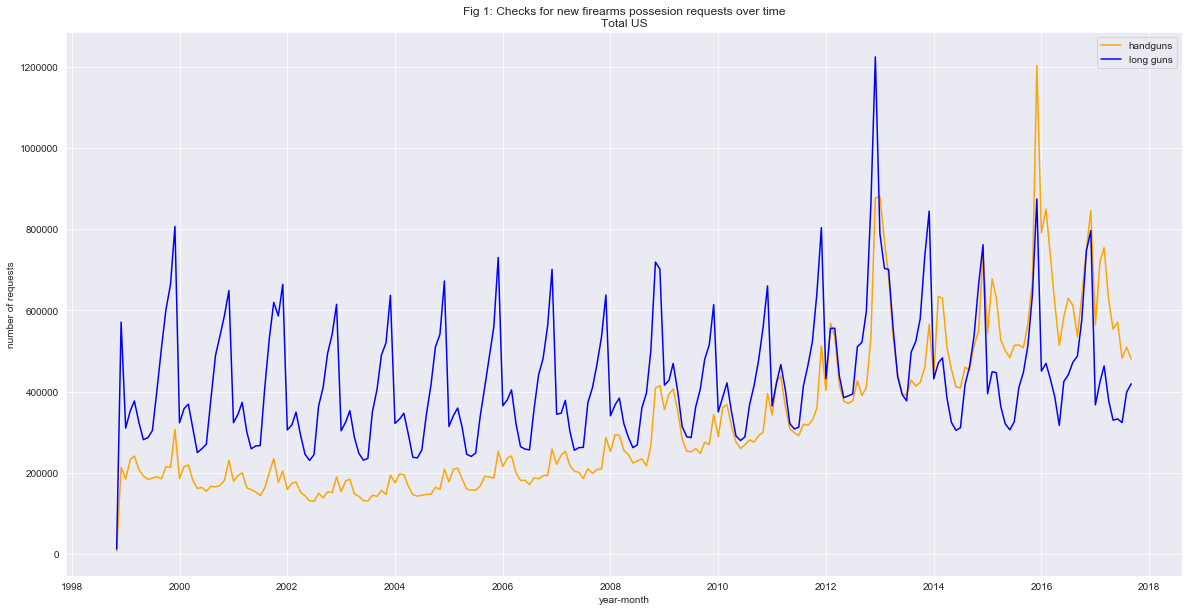

In [551]:
# create the line plot
x = gun_over_time.index # month on the x axis
handguns = gun_over_time.new_handgun
long_guns = gun_over_time.new_long_gun

plt.subplots(figsize=(20,10))
plt.plot(x, handguns, color='orange', label='handguns')
plt.plot(x, long_guns, color='blue', label='long guns')
plt.title('Fig 1: Checks for new firearms possesion requests over time\nTotal US')
plt.xlabel('year-month')
plt.ylabel('number of requests')
plt.legend();

##### Fig 1: comments
From the graph above three considerations seem reasonable:

- Since the collection of data started, the new requests for possession of long guns has been pretty stable
- The request for handguns has been stable as well until around 2006, then has started to grow. Initially it was well under the request for long guns, but it equalled and surpassed it around 2011-2014.
- For both handguns and long guns the pattern is definitely cyclical, with spikes during the winter months and lows in the summer ones.

<a id='rq2'></a>
### Research Question 2: Are there differences in handgun and long gun requests per capita among States?


Population data comes from the 2010 census and it provides some estimated data for 2010 and 2016 or estimated averages for the period 2011-2015. Therefore we going to average 2010 and 2016 data of df_census_clean (e.g. population_estimated) to get 2011-2015 estimates.

In the same way, we are going to use df_gun_clean data from 2010 to 2016 to get an average for the same period. We are again using the _new_handgun_ and _new_long_gun_ columns, to focus on new possesions requests.

For clarity, we are going to drop the year in the columns name, when all the averages refer to the period between 2010-2016.

In [552]:
df_census_clean.head()

,state,population_est_2016,population_est_2010,under_18_percent_2016,under_18_percent_2010,over_65_percent_2016,over_65_percent_2010,high_school_or_higher_percent_2011-2015,bachelor_or_higher_percent_2011-2015,median_household_income_2011-2015,per_capita_income_2011-2015,land_area_square_miles
0,alabama,4863300,4780131,22.6,23.7,16.1,13.8,84.3,23.5,43623,24091,50645.33
1,alaska,741894,710249,25.2,26.4,10.4,7.7,92.1,28.0,72515,33413,570640.95
2,arizona,6931071,6392301,23.5,25.5,16.9,13.8,86.0,27.5,50255,25848,113594.08
3,arkansas,2988248,2916025,23.6,24.4,16.3,14.4,84.8,21.1,41371,22798,52035.48
4,california,39250017,37254522,23.2,25.0,13.6,11.4,81.8,31.4,61818,30318,155779.22


In [553]:
# census averages
df_census_clean['population'] = df_census_clean[['population_est_2010', 'population_est_2016']].mean(axis=1)
df_census_clean['under_18_percent'] = df_census_clean[['under_18_percent_2010', 'under_18_percent_2016']].mean(axis=1)
df_census_clean['over_65_percent'] = df_census_clean[['over_65_percent_2010', 'over_65_percent_2016']].mean(axis=1)

In [554]:
df_census_clean.rename(columns=lambda x : x.replace("_2011-2015", ""), inplace=True)

df_census_clean.head(2)

,state,population_est_2016,population_est_2010,under_18_percent_2016,under_18_percent_2010,over_65_percent_2016,over_65_percent_2010,high_school_or_higher_percent,bachelor_or_higher_percent,median_household_income,per_capita_income,land_area_square_miles,population,under_18_percent,over_65_percent
0,alabama,4863300,4780131,22.6,23.7,16.1,13.8,84.3,23.5,43623,24091,50645.33,4821715.5,23.15,14.95
1,alaska,741894,710249,25.2,26.4,10.4,7.7,92.1,28.0,72515,33413,570640.95,726071.5,25.80,9.05


In [555]:
# dataframe for means
df_census_means = df_census_clean[['state', 'land_area_square_miles', 'population', 'under_18_percent', 'over_65_percent', 'high_school_or_higher_percent', 'bachelor_or_higher_percent', 'median_household_income', 'per_capita_income']]
df_census_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
state                            50 non-null object
land_area_square_miles           50 non-null float64
population                       50 non-null float64
under_18_percent                 50 non-null float64
over_65_percent                  50 non-null float64
high_school_or_higher_percent    50 non-null float64
bachelor_or_higher_percent       50 non-null float64
median_household_income          50 non-null int64
per_capita_income                50 non-null int64
dtypes: float64(6), int64(2), object(1)
memory usage: 3.6+ KB


In [556]:
# select the data we are interested in: 2010-2016, state,
# handgun+private_sale_handgun, long_gun+private_sale_long_gun;
# get the means
df_gun_means = df_gun_clean.query('month >= "2010-01-01" & month <= "2016-12-01"')[['state', 'new_handgun', 'new_long_gun']].groupby('state').mean()
df_gun_means.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Alabama to Wyoming
Data columns (total 2 columns):
new_handgun     55 non-null float64
new_long_gun    55 non-null float64
dtypes: float64(2)
memory usage: 1.3+ KB


In [557]:
df_gun_means.tail(3)

,new_handgun,new_long_gun
state,,
West Virginia,6409.309524,7327.607143
Wisconsin,11468.119048,12330.166667
Wyoming,1791.809524,2171.071429


In [558]:
# states name are not lowercase and have spaces
# state is the index, not a column
df_gun_means.rename(index = lambda x : x.lower().replace(' ', '_'), inplace=True)
df_gun_means = df_gun_means.reset_index()
df_gun_means.tail(3)

,state,new_handgun,new_long_gun
52,west_virginia,6409.309524,7327.607143
53,wisconsin,11468.119048,12330.166667
54,wyoming,1791.809524,2171.071429


##### Merging the dataframes

We can now merge the two "means" dataframe on the _state_ column.

We will use an outer join, because the two _state_ lists are different one from the other and I'd like to see who are the difference between the two (otherwise I could have used an inner join).

In [559]:
# join the two dataframe
df_g_c = df_gun_means.merge(df_census_means, left_on='state', right_on='state', how='outer')
df_g_c

,state,new_handgun,new_long_gun,land_area_square_miles,population,under_18_percent,over_65_percent,high_school_or_higher_percent,bachelor_or_higher_percent,median_household_income,per_capita_income
0,alabama,14226.976190,13564.011905,50645.33,4821715.5,23.1500,14.9500,84.300,23.500,43623.0,24091.0
1,alaska,2819.761905,3157.726190,570640.95,726071.5,25.8000,9.0500,92.100,28.000,72515.0,33413.0
2,arizona,10879.345238,7869.595238,113594.08,6661686.0,24.5000,15.3500,86.000,27.500,50255.0,25848.0
3,arkansas,5562.750000,7004.357143,52035.48,2952136.5,24.0000,15.3500,84.800,21.100,41371.0,22798.0
4,california,34111.797619,33482.500000,155779.22,38252269.5,24.1000,12.5000,81.800,31.400,61818.0,30318.0
5,colorado,15703.404762,13500.119048,103641.89,5284934.5,23.6000,12.1500,90.700,38.100,60629.0,32217.0
6,connecticut,6599.690476,4108.273810,4842.36,3575283.0,22.0000,15.1500,89.900,37.600,70331.0,38803.0
7,delaware,1485.738095,1330.702381,1948.54,925000.5,22.2000,15.9500,88.400,30.000,60509.0,30554.0
8,district_of_columbia,39.190476,2.202381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,florida,40396.702381,22515.547619,53624.76,19708515.5,20.7000,18.6000,86.900,27.300,47507.0,26829.0


There are 5 jurisdictions for which no census data are availables: District of Columbia, Guam, Mariana Islands, Puerto Rico and Virgin Islands. We'll drop those rows.

In [560]:
# drop rows without census data
df_g_c.dropna(inplace=True)
df_g_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 54
Data columns (total 11 columns):
state                            50 non-null object
new_handgun                      50 non-null float64
new_long_gun                     50 non-null float64
land_area_square_miles           50 non-null float64
population                       50 non-null float64
under_18_percent                 50 non-null float64
over_65_percent                  50 non-null float64
high_school_or_higher_percent    50 non-null float64
bachelor_or_higher_percent       50 non-null float64
median_household_income          50 non-null float64
per_capita_income                50 non-null float64
dtypes: float64(10), object(1)
memory usage: 4.7+ KB


- We are going to find out the request for handgun and long gun per capita percentages by state, dividing the request by the population minus the under 18s (because in most states and circumstances they have no right to purchase and possess firearms).


In [561]:
#handgun and long gun requests per capita
df_g_c['handgun_per_capita_percent'] = df_g_c.new_handgun * 100 / (df_g_c.population - (df_g_c.population / 100 * df_g_c.under_18_percent))
df_g_c['long_gun_per_capita_percent'] = df_g_c.new_long_gun * 100 / (df_g_c.population - (df_g_c.population / 100 * df_g_c.under_18_percent))
df_g_c['population_density'] = df_g_c.population / df_g_c.land_area_square_miles
df_g_c.head(3)

,state,new_handgun,new_long_gun,land_area_square_miles,population,under_18_percent,over_65_percent,high_school_or_higher_percent,bachelor_or_higher_percent,median_household_income,per_capita_income,handgun_per_capita_percent,long_gun_per_capita_percent,population_density
0,alabama,14226.976190,13564.011905,50645.33,4821715.5,23.15,14.95,84.3,23.5,43623.0,24091.0,0.383943,0.366052,95.205530
1,alaska,2819.761905,3157.726190,570640.95,726071.5,25.80,9.05,92.1,28.0,72515.0,33413.0,0.523394,0.586126,1.272379
2,arizona,10879.345238,7869.595238,113594.08,6661686.0,24.50,15.35,86.0,27.5,50255.0,25848.0,0.216308,0.156466,58.644658


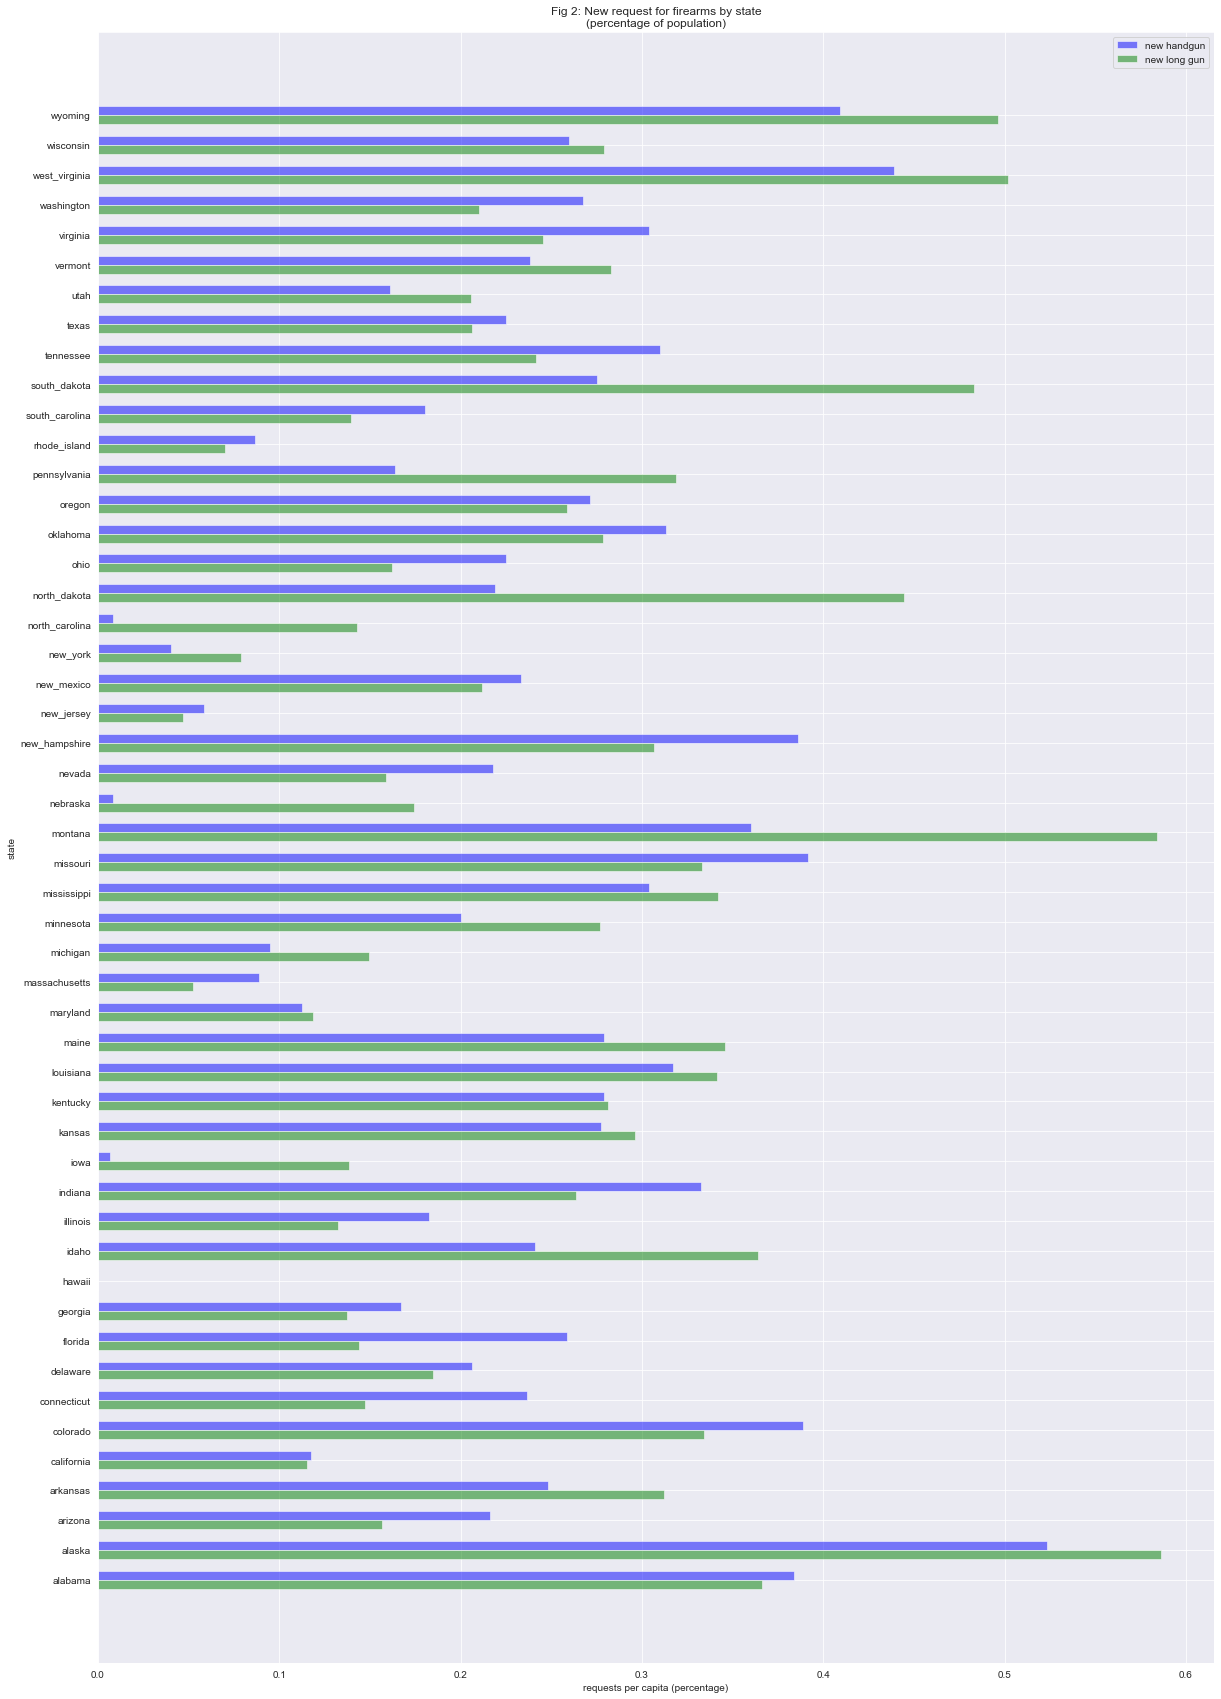

In [562]:
# new request for firearms by state
plt.subplots(figsize=(20,30))

ind = np.arange(df_g_c.shape[0])
width = 0.30

plt.barh(ind + width, df_g_c['handgun_per_capita_percent'], width, alpha=0.5, color='blue', label='new handgun')
plt.barh(ind, df_g_c['long_gun_per_capita_percent'], width, alpha=0.5, color='green', label='new long gun')

locations = ind + width / 2
labels = df_g_c['state']
plt.yticks(locations, labels)

plt.title('Fig 2: New request for firearms by state\n(percentage of population)')
plt.ylabel('state')
plt.xlabel('requests per capita (percentage)')
plt.legend();

##### Fig 2: comments

There is a lot of variability between states,
- in the type of gun requested: there are State with similar requests, others where the handgun request are far more than the long gun ones and still others where the contrary is true.
- and in the percentage of population who start a request: it can go from nearly zero to almost .6 percent.


<a id='rq3'></a>
### Research Question 3: Do the different percentages across States have a correlation with demographic data such as population density, education or income?

- We are then going to try and see if there is a correlation with population density (population/land area), college education or average income.

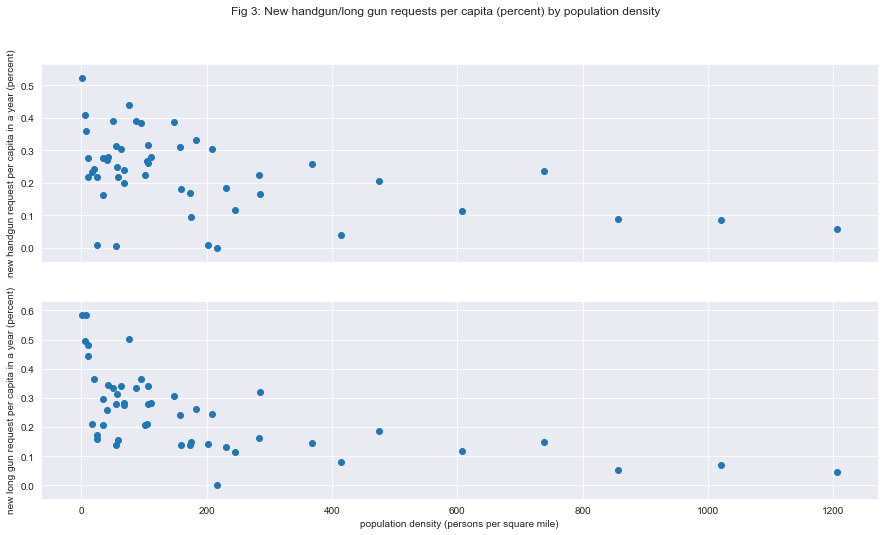

In [563]:
# new handgun vs long gun requests per capita by population density
fig, (t1, t2) = plt.subplots(2, figsize=(15,8), sharex=True)
fig.suptitle('Fig 3: New handgun/long gun requests per capita (percent) by population density')
t1.scatter(df_g_c['population_density'], df_g_c['handgun_per_capita_percent'])
t2.scatter(df_g_c['population_density'], df_g_c['long_gun_per_capita_percent'])

plt.xlabel('population density (persons per square mile)')
t1.set(ylabel='new handgun request per capita in a year (percent)')
t2.set(ylabel='new long gun request per capita in a year (percent)');

##### Fig 3: comments

The two graphs above look very similar one another. They both don't show a linear correlation between the population density and the new firearm requests. It looks, anyhow, that for higher population densities the percentage of people requesting a firearm for the first time is normally low.


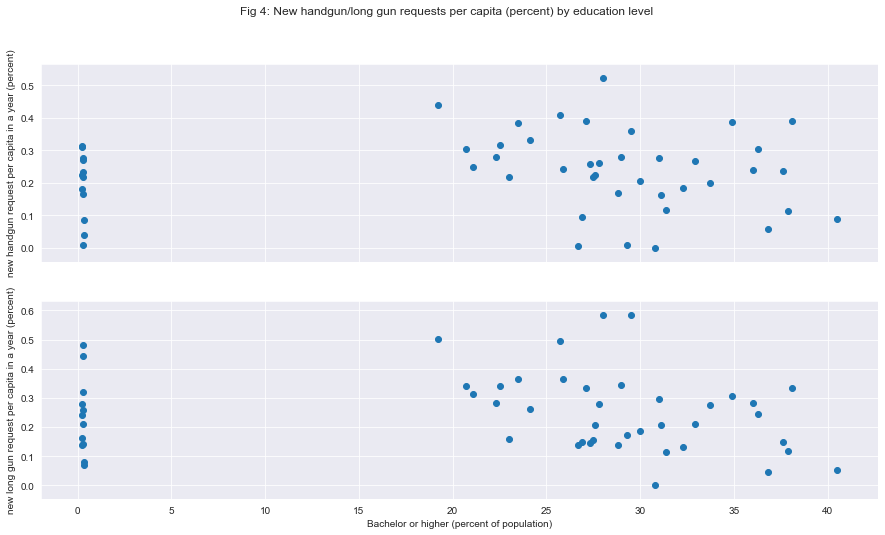

In [564]:
# new handgun vs long gun requests per capita by education
fig, (t1, t2) = plt.subplots(2, figsize=(15,8), sharex=True)
fig.suptitle('Fig 4: New handgun/long gun requests per capita (percent) by education level')
t1.scatter(df_g_c['bachelor_or_higher_percent'], df_g_c['handgun_per_capita_percent'])
t2.scatter(df_g_c['bachelor_or_higher_percent'], df_g_c['long_gun_per_capita_percent'])

plt.xlabel('Bachelor or higher (percent of population)')
t1.set(ylabel='new handgun request per capita in a year (percent)')
t2.set(ylabel='new long gun request per capita in a year (percent)');


##### Fig 4: comments

The two scatterplots about request percentages and educational level of the population look strange, as if there were a few States where higher education was almost non-existent.
Looking better, there is a problem with the original data, where the data about education are given with two different formats (e.g. 25% or 0.25).

The problem could be fixed, but we should have also a look at the census website to make sure that the figures are indeed correct.

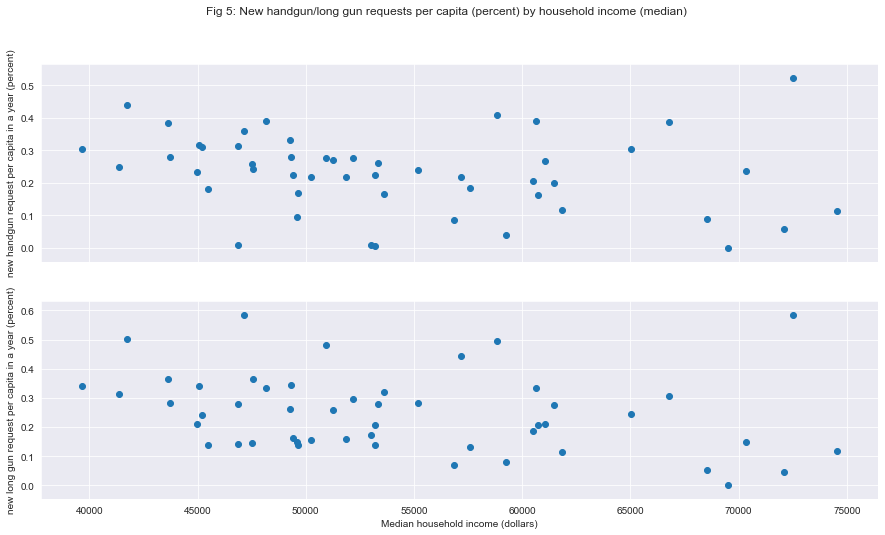

In [565]:
# new handgun vs long gun requests per capita by income
fig, (t1, t2) = plt.subplots(2, figsize=(15,8), sharex=True)
fig.suptitle('Fig 5: New handgun/long gun requests per capita (percent) by household income (median)')
t1.scatter(df_g_c['median_household_income'], df_g_c['handgun_per_capita_percent'])
t2.scatter(df_g_c['median_household_income'], df_g_c['long_gun_per_capita_percent'])

plt.xlabel('Median household income (dollars)')
t1.set(ylabel='new handgun request per capita in a year (percent)')
t2.set(ylabel='new long gun request per capita in a year (percent)');


##### Fig 5: comments

Again in this case (request by house income), there is no correlation between the two parameters

<a id='conclusions'></a>
## Conclusions

##### RQ1: Request for handguns vs long guns has changed over time?
We considered only a subset of the available information, in particular the data relative a people requesting to buy a handgun or a long gun for the first time, not already in possession of a valid permit.

Moreover, these request are simply the beginning of a transaction, the check results (positive or negative) are not given and even in the case the result was positive, not necessarily a gun has been purchased.

Therefore I would describe the data as an indicator of the interest shown by people in possessing firearm. This interest, for our subset, seems to be quite stable for long guns, while it is increasing for handguns.

If we wanted to understand why, it could be useful to look for data about the purposes of possessing firearms. The same goes for the cyclical pattern followed by the requests. 


##### - RQ2: Are there differences in handgun and long gun requests per capita among States? - RQ3:  Do the different percentages across States have a correlation with demographic data such as population density, education or income?
Again, we used our subset regarding new possession requests, so we are considering only people without valid permit yet. 
Considering the results as indicator for further exploration it seems that

- RQ2: Yes, different States have different preferences of firearms and different percentages of people interested in acquiring a new weapon for the first time

- RQ3: Not really. The only possible indication we found was that people from State with a high population density seem to be less interested in requesting a firearm.

Fig 4 revealed that there is a problem in the data about education (fixable checking the correct data on the Census website).

As a last observation, the differences among States observed in Fig 2 surely are due to some reasons, and definitely we shouldn't rule out density, education or income based on these plot, at least because:
- they should be explored in more detail (for instance, population density calculated on a State area may be misleading if most of its people live in a big city and there is a lot of uninhabited land around)
- there should be adjustments made for the fact that different States have different laws about firearm possession.


<a id='notes'></a>
## Notes
Websites I used as references for the code:
- https://stackoverflow.com/
- https://pandas.pydata.org/
- https://numpy.org/
- https://www.geeksforgeeks.org/
- https://realpython.com
- https://medium.com
- https://mathdatasimplified.com/

About the data:
- https://www.census.gov/
- https://www.fbi.gov/
- https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md
